In [59]:
using DifferentialEquations
using LinearAlgebra
using Plots

In [60]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("GeneratePoints.jl")

PointsOnSphere (generic function with 2 methods)

In [61]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.001
N = 100

100

In [62]:
initial_points = [ ]
for i = 1:100
    x = i*[0.1,0.1,0.1]
    push!(initial_points, x)
end

In [63]:
M = zeros(length(initial_points), N)
for i = 1:length(initial_points)
    x = initial_points[i]
    X = []
    push!(X,LorenzSolutionFixedTimeStep(p, Δt, N, x, RK4))
    push!(X,LorenzSolutionFixedTimeStep(p, Δt, N, x, EulerForward))
    for j = 1:N
        M[i,j] = Correlation(X[1][:,j], X[2][:,j])
    end
end


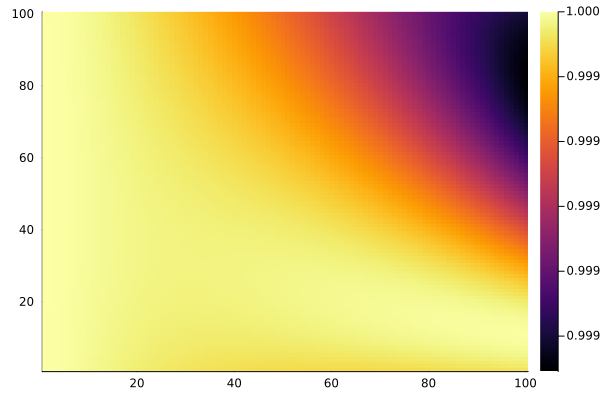

In [64]:
heatmap(M)

In [65]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.01
N = 1000
initial_points = [ ]
points = 100
for i = 1:points
    x = i*[0.01,0,0]
    push!(initial_points, x)
end

In [66]:
M = CorrelationMatrix(p,Δt,N,initial_points,[EulerForward RadauIIA5],[1 2]);

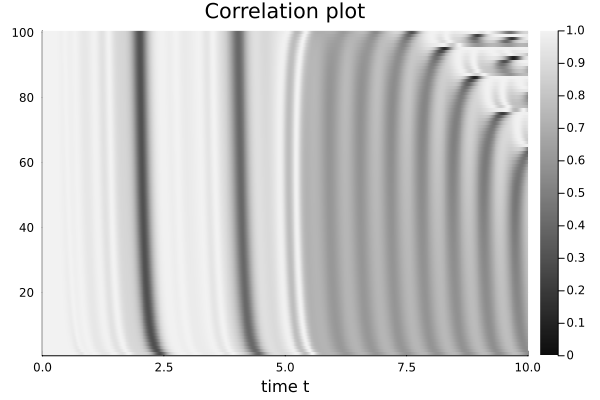

In [67]:
PlotPipPlot(M,Δt,cmap=:grays, clim=(0,1), yaxis=true)

In [68]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.01
N = 100

xint= [-50, 50]
dx = 5
yint = [-50, 50]
dy = 5
zint = [-50, 50]
dz = 5

initial_points = PointsInCuboid(dx, xint, dy, yint, dz, zint);

In [69]:
M = CorrelationMatrix(p,Δt,N,initial_points,[RK4 RadauIIA5],[4 1]);

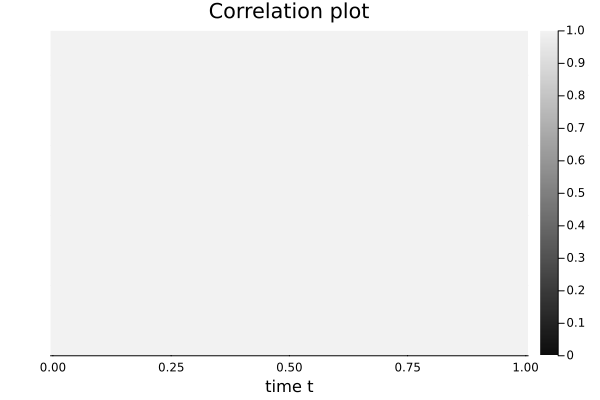

In [70]:
PlotPipPlot(M,Δt,clim=(0,1))